# Position and Velocity

This is a presentation for Computer Science Club having to do with Kalman filters.  The idea of this notebook is a graphical display of how the process covariance and measurement covariance for a simple Kalman state space (position and velocity) can give a better estimate.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class Plot:
    def __init__(self, limits=((-10,10),(-10,10))):
        x, y = limits
        x_min, x_max = x
        y_min, y_max = y
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
    def scatter(self, x, y, color=5, area=20):
        areas = [area for i in range(len(x))]
        colors = [color for i in range(len(x))]
        plt.scatter(x, y, s=areas, c=colors, alpha=0.5, edgecolor=None)
        
    def show(self):
        plt.show() 
        

class Gaussian:
    def generate(self, params, samples=100):
        self.data = []
        for i in range(samples):
            self.data.append(np.random.normal(params[0], params[1]))
    
    def dist(self):
        return self.data

At first we have a reasonable estimate (measurement error) of the position, but no idea what the velocity is.  We can initialize the state covariance to the measurement with the measurement error and a high variance for te velocity.

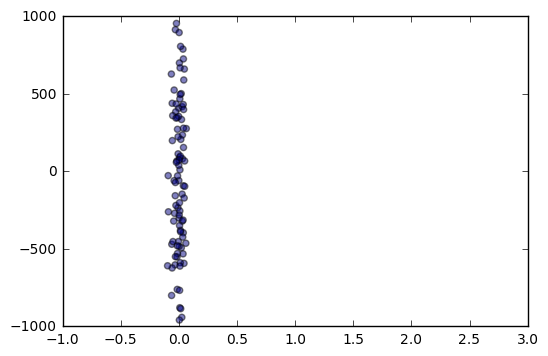

In [99]:
p = Plot(((-1,3),(-1000,1000)))            
            
# Position estimate with std 0.03, velocity with std 500.0
g1 = Gaussian()
g1.generate((0.0, 0.03))
g2 = Gaussian()
g2.generate((0.0, 500.0))
p.scatter(g1.dist(), g2.dist())    

p.show()    
    

When we next get a measurement, the model has information about the velocity enough to estimate it.

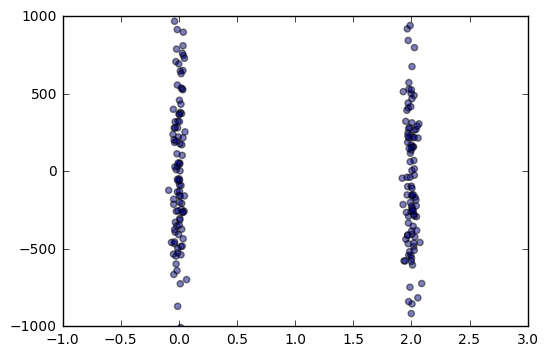

In [122]:
p = Plot(((-1,3),(-1000,1000)))            
            
# Position estimate with std 0.03, velocity with std 500.0
g1 = Gaussian()
g1.generate((0.0, 0.03))
g2 = Gaussian()
g2.generate((0.0, 500.0))
p.scatter(g1.dist(), g2.dist())    

# New position estimate with std 0.03, velocity with std 500.0
g1 = Gaussian()
g1.generate((2.0, 0.03))
g2 = Gaussian()
g2.generate((0.0, 500.0))
p.scatter(g1.dist(), g2.dist())    

p.show()    
    

Now we will zoom in on the graph a bit so that we can resolve the verticle axis, which is velocity.  Now we have an estimate with a covariance calculated that estimates the velocity.  Like the estimation for the position, it has significant error in the other dimension.  This gets us a lot closer in estimating the posterior state (both position and velocity) as we will take the posterior of the Gaussians.  As we learned before, this is the product.  The result of this is that the point of intersection is the maximum, and the specific shape is defined by the covariances.  With each successive iteration with newly predicted state (both position and velocity) and new measurements (in this case just position), we will have additionally refined estimates of state until we are at a point governed by the assumed measurement and process noise in the covariance matrices and the actual variance in measurement variable based on our observations.

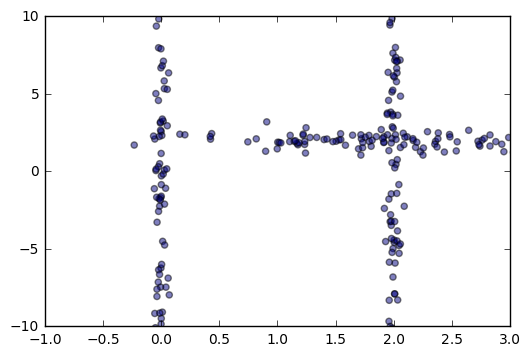

In [121]:
p = Plot(((-1,3),(-10,10)))            

# Position estimate 1
g1 = Gaussian()
g1.generate((0.0, 0.03))
g2 = Gaussian()
g2.generate((0.0, 10.0))
p.scatter(g1.dist(), g2.dist())    

# Position estimate 2
g1 = Gaussian()
g1.generate((2.0, 0.03))
g2 = Gaussian()
g2.generate((0.0, 10.0))
p.scatter(g1.dist(), g2.dist())    

# Velocity estimate based on the two means known above and the measurement error 
g1 = Gaussian()
g1.generate((2.0, 0.8))
g2 = Gaussian()
g2.generate((2.0, 0.4))
p.scatter(g1.dist(), g2.dist())  

p.show()    